In [1]:
from influxdb import InfluxDBClient
import matplotlib
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted

# avoiding type 3 fonts: http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

client = InfluxDBClient(host='localhost', port=8086)
client.switch_database('rpkilog')

In [2]:
afrinic_results   = client.query("SELECT DISTINCT(saddr) FROM connect WHERE pp = 'afrinic' AND time >= '2020-04-30' AND time < '2020-05-01'")
apnic_results     = client.query("SELECT DISTINCT(saddr) FROM connect WHERE pp = 'apnic' AND time >= '2020-04-30' AND time < '2020-05-01'")
ca_rg_net_results = client.query("SELECT DISTINCT(saddr) FROM connect WHERE pp = 'ca.rg.net' AND time >= '2020-04-30' AND time < '2020-05-01'")

In [3]:
afrinic_list = []
afrinic_points = afrinic_results.get_points()

for point in afrinic_points:
    afrinic_list.append(point['distinct'])

afrinic_set = set(afrinic_list)

In [4]:
apnic_list = []
apnic_points = apnic_results.get_points()

for point in apnic_points:
    apnic_list.append(point['distinct'])

apnic_set = set(apnic_list)

In [5]:
ca_rg_net_list = []
ca_rg_net_points = ca_rg_net_results.get_points()

for point in ca_rg_net_points:
    ca_rg_net_list.append(point['distinct'])

ca_rg_net_set = set(ca_rg_net_list)

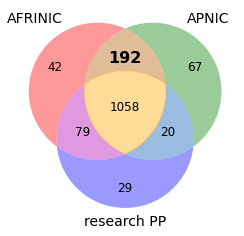

In [6]:
v = venn3_unweighted( [afrinic_set, apnic_set, ca_rg_net_set], ('AFRINIC', 'APNIC', 'research PP'))
v.get_patch_by_id('111').set_color('orange')

for text in v.set_labels:
    text.set_fontsize(14)
for text in v.subset_labels:
    text.set_fontsize(12)
    
# bring attention to the intersection of AFRINIC and APNIC
rir_intersection = v.subset_labels[2]
rir_intersection.set_fontsize(16)
rir_intersection.set_fontweight('bold')

plt.savefig("imc20/venn-20200430.pdf", bbox_inches='tight', pad_inches=0) # tight removes whitespace borders
plt.show()
plt.close()